# Carter-Penrose diagrams of Schwarzschild spacetime

This worksheet demonstrates a few capabilities of <a href="http://sagemanifolds.obspm.fr/">SageManifolds</a> (version 0.9.1) in producing Carter-Penrose diagrams.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v0.9.1/SM_Carter-Penrose_diag.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

## Spacetime manifold

We declare the Schwarzschild spacetime as a 4-dimensional differentiable manifold:

In [2]:
M = Manifold(4, 'M', r'\mathcal{M}') ; M

4-dimensional differentiable manifold M

The manifold $\mathcal{M}$ is diffeomorphic to $\mathbb{R}^2\times\mathbb{S}^2$. Since we shall deal with spherical coordinates $(\theta,\varphi)$ on $\mathbb{S}^2$, we shall consider the part $\mathcal {M}_0$ of $\mathcal{M}$ that excludes the two poles of $\mathbb{S}^2$ where the coordinate $\varphi$ is not defined: 
$$\mathcal{M}_0 \simeq \mathbb{R}^2\times\left(\mathbb{S}^2\setminus\{N,S\} \right),$$
where $N$ (resp. $S$) stands for the North pole (resp. South pole):

In [3]:
M0 = M.open_subset('M0', r'\mathcal{M}_0') ; M0

Open subset M0 of the 4-dimensional differentiable manifold M

<p>$\mathcal{M}_0$ can be split into 4 regions, corresponding to the 4 quadrants in the Kruskal diagram.Let us denote by $\mathcal{R}_{\mathrm{I}}$ to $\mathcal{R}_{\mathrm{IV}}$ the<em> interiors</em> of these 4 regions (i.e. we exclude the past and furture event horizons from these regions). $\mathcal{R}_{\mathrm{I}}$ and  $\mathcal{R}_{\mathrm{III}}$  are asymtotically flat regions outside the event horizons;  $\mathcal{R}_{\mathrm{II}}$ is inside the future event horizon and $\mathcal{R}_{\mathrm{IV}}$ is inside the past event horizon.</p>

In [4]:
regI = M0.open_subset('R_I', r'\mathcal{R}_{\mathrm{I}}')
regII = M0.open_subset('R_II', r'\mathcal{R}_{\mathrm{II}}')
regIII = M0.open_subset('R_III', r'\mathcal{R}_{\mathrm{III}}')
regIV = M0.open_subset('R_IV', r'\mathcal{R}_{\mathrm{IV}}')
regI, regII, regIII, regIV

(Open subset R_I of the 4-dimensional differentiable manifold M,
 Open subset R_II of the 4-dimensional differentiable manifold M,
 Open subset R_III of the 4-dimensional differentiable manifold M,
 Open subset R_IV of the 4-dimensional differentiable manifold M)

The mass parameter $m$ of Schwarzschild spacetime is declared as a symbolic real-valued variable:

In [5]:
m = var('m', domain='real') ; assume(m>=0)

<h2>Kruskal-Szekeres coordinates</h2>
<p>The Kruskal-Szekeres coordinates $(T,X,\theta,\varphi)$ cover $\mathcal{M}_0$ and are subject to the restrictions $T^2<1+X^2$:</p>

In [6]:
XKS.<T,X,th,ph> = M0.chart(r'T X th:(0,pi):\theta ph:(0,2*pi):\varphi')
XKS.add_restrictions(T^2 < 1 + X^2)
XKS

Chart (M0, (T, X, th, ph))

<p>The Kruskal-Szekeres chart ploted in terms of itself:</p>

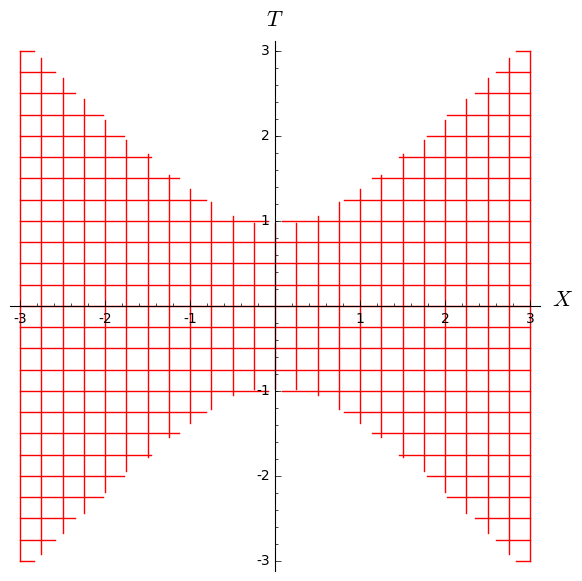

In [7]:
XKS.plot(XKS, ambient_coords=(X,T), max_range=3, nb_values=25)

<h3>Compactified coordinates</h3>
<p>The coordinates $(\tilde T, \tilde X, \theta, \varphi)$ associated with the conformal compactification of the Schwarzschild spacetime are</p>

In [8]:
XCP.<T1,X1,th,ph> = M0.chart(r'T1:(-pi/4,pi/4):\tilde{T} X1:(-pi/2,pi/2):\tilde{X} th:(0,pi):\theta ph:(0,2*pi):\varphi')
XCP.add_restrictions([-pi/2+abs(X1)<T1, T1<pi/2-abs(X1)])
XCP

Chart (M0, (T1, X1, th, ph))

<p>The chart of compactified coordinates plotted in terms of itself:</p>

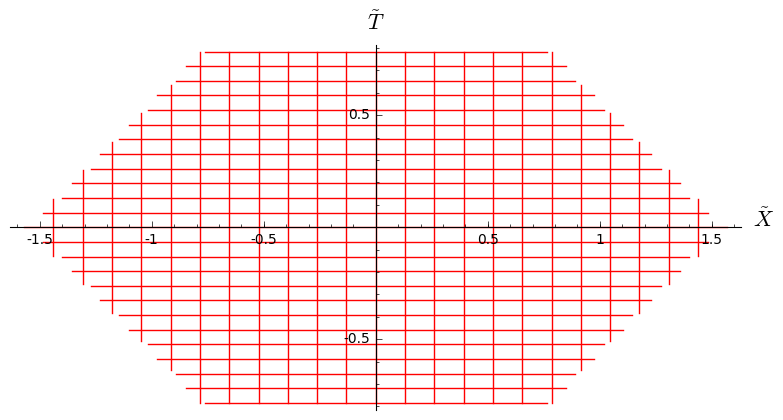

In [9]:
XCP.plot(XCP, ambient_coords=(X1,T1), nb_values=25)

<p>The transition map from <span id="cell_outer_5">Kruskal-Szekeres coordinates to the compactified ones:<br /></span></p>

In [10]:
KS_to_CP = XKS.transition_map(XCP, [1/2*(atan(T+X)+atan(T-X)), 1/2*(atan(T+X)-atan(T-X)), th, ph])
print(KS_to_CP)
KS_to_CP.display()

Change of coordinates from Chart (M0, (T, X, th, ph)) to Chart (M0, (T1, X1, th, ph))


T1 = 1/2*arctan(T + X) + 1/2*arctan(T - X)
X1 = 1/2*arctan(T + X) - 1/2*arctan(T - X)
th = th
ph = ph

<p>The <span id="cell_outer_71"><span id="cell_outer_5">Kruskal-Szekeres chart plotted in terms of the compactified coordinates:<br /></span></span></p>

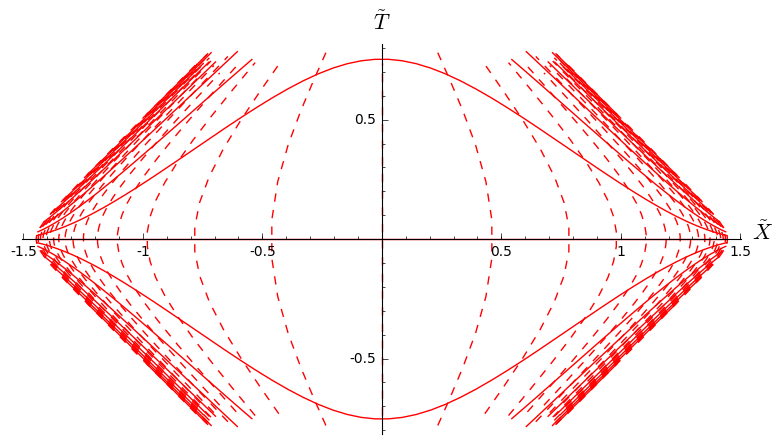

In [11]:
graphKS = XKS.plot(XCP, ambient_coords=(X1,T1), fixed_coords={th:pi/2,ph:0}, 
                   ranges={T:(-15,15), X:(-8,8)}, nb_values=33, plot_points=150, 
                   style={T:'--', X:'-'})
show(graphKS)

<p><span id="cell_outer_8"><br id="cell_outer_8" /></span></p>
<h2>Schwarzschild-Droste coordinates</h2>
<p>The standard <em>Schwarzschild-Droste coordinates</em> (also called simply <em>Schwarzschild coordinates</em>) $(t,r,\theta,\varphi)$ are defined on $\mathcal{R}_{\mathrm{I}}\cup \mathcal{R}_{\mathrm{II}}$:</p>

In [12]:
regI_II = regI.union(regII)
XSD.<t,r,th,ph> = regI_II.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi')
XSD.add_restrictions(r!=2*m)
XSD

Chart (R_I_union_R_II, (t, r, th, ph))

<p>We naturally introduce two subcharts as the restrictions of the chart XSD to regions $\mathcal{R}_{\mathrm{I}}$ and $\mathcal{R}_{\mathrm{II}}$ respectively. Since, in terms of the Schwarzschild-Droste coordinates, $\mathcal{R}_{\mathrm{I}}$ (resp. $\mathcal{R}_{\mathrm{II}}$) is defined by $r>2m$ (resp. $r<2m$), we set</p>

In [13]:
XSDI = XSD.restrict(regI, r>2*m)
XSDII = XSD.restrict(regII, r<2*m)
XSDI, XSDII

(Chart (R_I, (t, r, th, ph)), Chart (R_II, (t, r, th, ph)))

<p>The metric tensor is defined by its components w.r.t. Schwarzschild-Droste coordinates:</p>

In [14]:
g = M.lorentzian_metric('g')
M.set_default_chart(XSD)
M.set_default_frame(XSD.frame())
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

<h3>Transition map between the <span id="cell_outer_9">Schwarzschild-Droste chart and the Kruskal</span><span id="cell_outer_71"><span id="cell_outer_5">-Szekeres one<br /></span></span></h3>

In [15]:
SDI_to_KS = XSDI.transition_map(XKS, [sqrt(r/(2*m)-1)*exp(r/(4*m))*sinh(t/(4*m)),
                                      sqrt(r/(2*m)-1)*exp(r/(4*m))*cosh(t/(4*m)), th, ph],
                                restrictions2=[X>0, T<X, T>-X])
print(SDI_to_KS)
SDI_to_KS.display()

Change of coordinates from Chart (R_I, (t, r, th, ph)) to Chart (R_I, (T, X, th, ph))


T = sqrt(1/2*r/m - 1)*e^(1/4*r/m)*sinh(1/4*t/m)
X = sqrt(1/2*r/m - 1)*cosh(1/4*t/m)*e^(1/4*r/m)
th = th
ph = ph

In [16]:
SDII_to_KS = XSDII.transition_map(XKS, [sqrt(1-r/(2*m))*exp(r/(4*m))*cosh(t/(4*m)),
                                        sqrt(1-r/(2*m))*exp(r/(4*m))*sinh(t/(4*m)), th, ph], 
                                  restrictions2=[T>0, X<T, T>-X])
print(SDII_to_KS)
SDII_to_KS.display()

Change of coordinates from Chart (R_II, (t, r, th, ph)) to Chart (R_II, (T, X, th, ph))


T = sqrt(-1/2*r/m + 1)*cosh(1/4*t/m)*e^(1/4*r/m)
X = sqrt(-1/2*r/m + 1)*e^(1/4*r/m)*sinh(1/4*t/m)
th = th
ph = ph

<h3>Transition map between the <span id="cell_outer_9">Schwarzschild-Droste chart and the chart of compactified coordinates</span></h3>
<p><span><br />The transition map is obtained by composition of previously defined ones:<br /></span></p>

In [17]:
SDI_to_CP = KS_to_CP.restrict(regI) * SDI_to_KS
print(SDI_to_CP)
SDI_to_CP.display()

Change of coordinates from Chart (R_I, (t, r, th, ph)) to Chart (R_I, (T1, X1, th, ph))


T1 = 1/2*arctan(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m)) + 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m))
X1 = 1/2*arctan(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m)) - 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m))
th = th
ph = ph

In [18]:
SDII_to_CP = KS_to_CP.restrict(regII) * SDII_to_KS
print(SDII_to_CP)
SDII_to_CP.display()

Change of coordinates from Chart (R_II, (t, r, th, ph)) to Chart (R_II, (T1, X1, th, ph))


T1 = 1/2*arctan(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m)) - 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m))
X1 = 1/2*arctan(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m)) + 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m))
th = th
ph = ph

<h2>The Carter-Penrose diagram</h2>
<p>Plot of <span id="cell_outer_8">the Schwarzschild-Droste chart in region I in terms of the compactified coordinates:<br /></span></p>

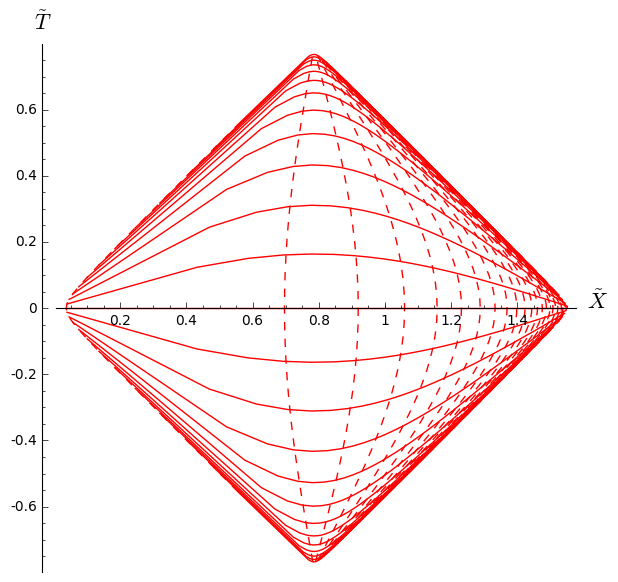

In [19]:
graphSDI = XSDI.plot(XCP, ranges={t:(-16,16), r:(2.001,12)}, fixed_coords={th:pi/2,ph:0}, 
                     ambient_coords=(X1,T1), nb_values=25, style={t:'--', r:'-'}, 
                     parameters={m:1})
show(graphSDI)

<p>Same thing for the <span id="cell_outer_76"><span id="cell_outer_8">Schwarzschild-Droste chart in region II:<br /></span></span></p>

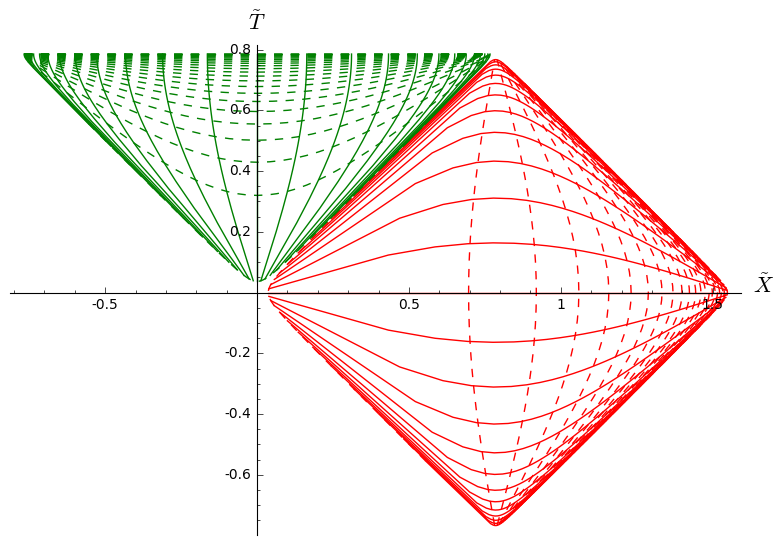

In [20]:
graphSDII = XSDII.plot(XCP, ranges={t:(-16,16), r:(0.001,1.999)}, fixed_coords={th:pi/2,ph:0}, 
                       ambient_coords=(X1,T1), nb_values=25, style={t:'--', r:'-'}, 
                       color='green', parameters={m:1})
show(graphSDI+graphSDII)

<h3>Schwarzschild-Droste coordinates in Regions III and IV</h3>
<p>We introduce a second patch $(t',r',\theta,\varphi)$ of Schwarzschild-Droste coordinates to cover $\mathcal{R}_{\mathrm{III}}\cup \mathcal{R}_{\mathrm{IV}}$:</p>

In [21]:
regIII_IV = regIII.union(regIV)
XSDP.<tp,rp,th,ph> = regIII_IV.chart(r"tp:t' rp:r':(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi")
XSDP.add_restrictions(rp!=2*m)
XSDP

Chart (R_III_union_R_IV, (tp, rp, th, ph))

In [22]:
XSDIII = XSDP.restrict(regIII, rp>2*m)
XSDIV = XSDP.restrict(regIV, rp<2*m)
XSDIII, XSDIV

(Chart (R_III, (tp, rp, th, ph)), Chart (R_IV, (tp, rp, th, ph)))

<p>The transition maps to <span id="cell_outer_71"><span id="cell_outer_5">Kruskal-Szekeres coordinates and compactified coordinates are defined in a manner similar to above:<br /></span></span></p>

In [23]:
SDIII_to_KS = XSDIII.transition_map(XKS, [-sqrt(rp/(2*m)-1)*exp(rp/(4*m))*sinh(tp/(4*m)),
                                          -sqrt(rp/(2*m)-1)*exp(rp/(4*m))*cosh(tp/(4*m)), th, ph],
                                   restrictions2=[X<0, X<T, T<-X])
print(SDIII_to_KS)
SDIII_to_KS.display()

Change of coordinates from Chart (R_III, (tp, rp, th, ph)) to Chart (R_III, (T, X, th, ph))


T = -sqrt(1/2*rp/m - 1)*e^(1/4*rp/m)*sinh(1/4*tp/m)
X = -sqrt(1/2*rp/m - 1)*cosh(1/4*tp/m)*e^(1/4*rp/m)
th = th
ph = ph

In [24]:
SDIV_to_KS = XSDIV.transition_map(XKS, [-sqrt(1-rp/(2*m))*exp(rp/(4*m))*cosh(tp/(4*m)),
                                        -sqrt(1-rp/(2*m))*exp(rp/(4*m))*sinh(tp/(4*m)), th, ph],
                                       restrictions2=[T<0, T<-X, T<X])
print(SDIV_to_KS)
SDIV_to_KS.display()

Change of coordinates from Chart (R_IV, (tp, rp, th, ph)) to Chart (R_IV, (T, X, th, ph))


T = -sqrt(-1/2*rp/m + 1)*cosh(1/4*tp/m)*e^(1/4*rp/m)
X = -sqrt(-1/2*rp/m + 1)*e^(1/4*rp/m)*sinh(1/4*tp/m)
th = th
ph = ph

In [25]:
SDIII_to_CP = KS_to_CP.restrict(regIII) * SDIII_to_KS
print(SDIII_to_CP)
SDIII_to_CP.display()

Change of coordinates from Chart (R_III, (tp, rp, th, ph)) to Chart (R_III, (T1, X1, th, ph))


T1 = -1/2*arctan(1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) + sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(-2*m + rp)/sqrt(m)) - 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) - sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(-2*m + rp)/sqrt(m))
X1 = -1/2*arctan(1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) + sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(-2*m + rp)/sqrt(m)) + 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) - sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(-2*m + rp)/sqrt(m))
th = th
ph = ph

In [26]:
SDIV_to_CP = KS_to_CP.restrict(regIV) * SDIV_to_KS
print(SDIV_to_CP)
SDIV_to_CP.display()

Change of coordinates from Chart (R_IV, (tp, rp, th, ph)) to Chart (R_IV, (T1, X1, th, ph))


T1 = -1/2*arctan(1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) + sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(2*m - rp)/sqrt(m)) + 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) - sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(2*m - rp)/sqrt(m))
X1 = -1/2*arctan(1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) + sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(2*m - rp)/sqrt(m)) - 1/2*arctan(-1/2*(sqrt(2)*cosh(1/4*tp/m)*e^(1/4*rp/m) - sqrt(2)*e^(1/4*rp/m)*sinh(1/4*tp/m))*sqrt(2*m - rp)/sqrt(m))
th = th
ph = ph

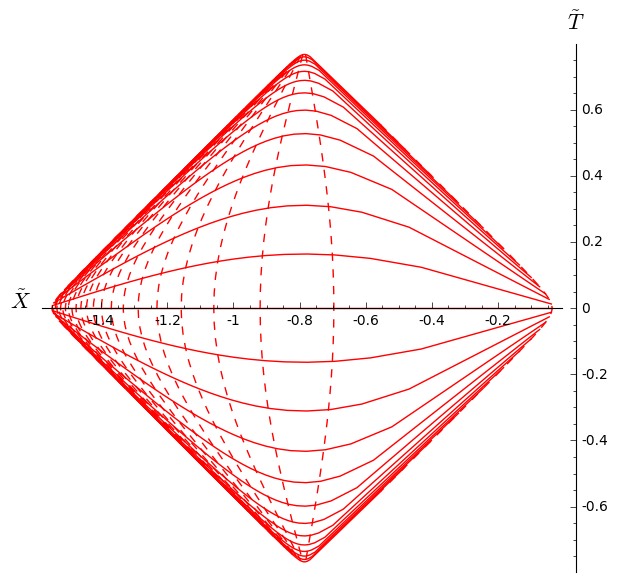

In [27]:
graphSDIII = XSDIII.plot(XCP, ranges={tp:(-16,16), rp:(2.001,12)}, fixed_coords={th:pi/2,ph:0}, 
                         ambient_coords=(X1,T1), nb_values=25, style={tp:'--', rp:'-'}, 
                         parameters={m:1})
show(graphSDIII)

<p>The final Carter-Penrose diagram of Schwarzschild spacetime:</p>

In [28]:
graphSDIV = XSDIV.plot(XCP, ranges={tp:(-16,16), rp:(0.001,1.999)}, fixed_coords={th:pi/2,ph:0}, 
                       ambient_coords=(X1,T1), nb_values=25, style={tp:'--', rp:'-'}, 
                       color='green', parameters={m:1})

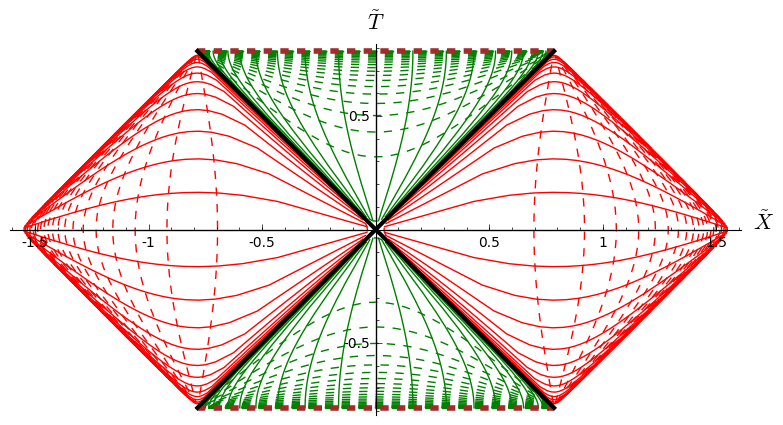

In [29]:
sing = line([(-pi/4,pi/4), (pi/4,pi/4)], color='brown', thickness=4, linestyle='--') + \
       line([(-pi/4,-pi/4), (pi/4,-pi/4)], color='brown', thickness=4, linestyle='--')
bifhor = line([(-pi/4,-pi/4), (pi/4,pi/4)], color='black', thickness=3) + \
         line([(-pi/4,pi/4), (pi/4,-pi/4)], color='black', thickness=3)
show(graphSDI+graphSDII+graphSDIII+graphSDIV+sing+bifhor, 
     axes_labels=graphSDI.axes_labels())